In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.create_date import create_date
from my_fun.nan_helper import nan_helper
from scipy.signal import savgol_filter
from my_fun.reverse_colourmap import reverse_colourmap
import matplotlib as mpl
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

In [2]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'MB_elv'

ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:       (lat: 70, lon: 82, time: 8760)
Coordinates:
  * time          (time) datetime64[ns] 2016-09-01 ... 2017-08-31T23:00:00
  * lat           (lat) float64 -8.98 -8.979 -8.979 ... -8.949 -8.949 -8.948
  * lon           (lon) float64 -77.65 -77.65 -77.65 ... -77.61 -77.61 -77.61
Data variables:
    HGT           (lat, lon) float32 ...
    MASK          (lat, lon) float32 ...
    SLOPE         (lat, lon) float32 ...
    ASPECT        (lat, lon) float32 ...
    T2            (time, lat, lon) float64 ...
    RH2           (time, lat, lon) float64 ...
    U2            (time, lat, lon) float64 ...
    PRES          (time, lat, lon) float64 ...
    G             (time, lat, lon) float64 ...
    RRR           (time, lat, lon) float64 ...
    N             (time, lat, lon) float64 ...
    RAIN          (time, lat, lon) float64 ...
    SNOWFALL      (time, lat, lon) float64 ...
    LWin          (time, lat, lon) float64 ...
    LWout         (time, lat, lon) float64 ...
    H             (time, lat, lon) float64 ...
    LE            (time, lat, lon) float64 ...
    B             (time, lat, lon) float64 ...
    surfMB        (time, lat, lon) float64 ...
    MB            (time, lat, lon) float64 ...
    Q             (time, lat, lon) float64 ...
    SNOWHEIGHT    (time, lat, lon) float64 ...
    TOTALHEIGHT   (time, lat, lon) float64 ...
    TS            (time, lat, lon) float64 ...
    ALBEDO        (time, lat, lon) float64 ...
    LAYERS        (time, lat, lon) float64 ...
    ME            (time, lat, lon) float64 ...
    intMB         (time, lat, lon) float64 ...
    EVAPORATION   (time, lat, lon) float64 ...
    SUBLIMATION   (time, lat, lon) float64 ...
    CONDENSATION  (time, lat, lon) float64 ...
    DEPOSITION    (time, lat, lon) float64 ...
    REFREEZE      (time, lat, lon) float64 ...
    subM          (time, lat, lon) float64 ...
    Z0            (time, lat, lon) float64 ...
    surfM         (time, lat, lon) float64 ...
Attributes:
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  True
    Full_fiels:                                 False
    Force_use_TP:                               False
    Force_use_N:                                False
    Tile_of_glacier_of_interest:                False
    Time_step_input_file_seconds:               3600
    Max_layers:                                 500
    Z_measurment_height:                        2.0
    Stability_correction:                       Ri
    Albedo_method:                              Oerlemans98
    Densification_method:                       Boone
    Penetrating_method:                         Bintanja95
    Roughness_method:                           Moelg12
    Saturation_water_vapour_method:             Sonntag90
    Initial_snowheight:                         1.0
    Initial_snow_layer_heights:                 0.01
    Initial_glacier_height:                     30.0
    Initial_glacier_layer_heights:              0.01
    Initial_top_density_snowpack:               300.0
    Initial_bottom_density_snowpack:            600.0
    Temperature_top:                            273.16
    Temperature_bottom:                         268.0
    Const_init_temp:                            0.1
    Center_snow_transfer_function:              1.2
    Spread_snow_transfer_function:              1.0
    Multiplication_factor_for_RRR_or_SNOWFALL:  1.0
    Minimum_snow_to_reset_albedo:               0.01
    Minimum_snow_layer_height:                  0.0015
    Remesh_method:                              log_profile
    First_layer_height_log_profile:             0.01
    Layer_stretching_log_profile:               1.2
    Merge_max:                                  1
    Density_threshold_merging:                  5
    Temper

In [3]:
ds['HGT'].where(ds['MASK']==1).min()

<xarray.DataArray 'HGT' ()>
array(4702.9404, dtype=float32)

In [4]:
ds['HGT'].where(ds['MASK']==1).max()

<xarray.DataArray 'HGT' ()>
array(5951.2983, dtype=float32)

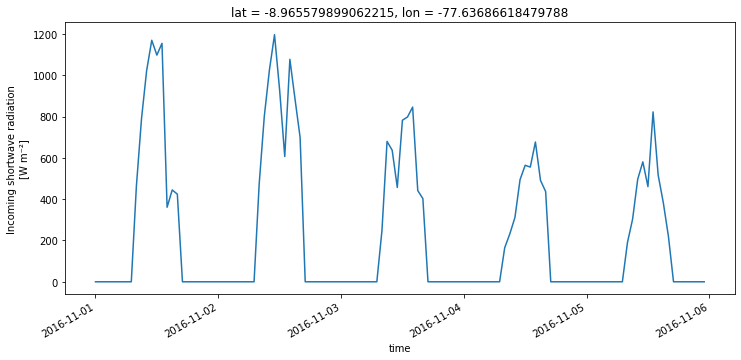

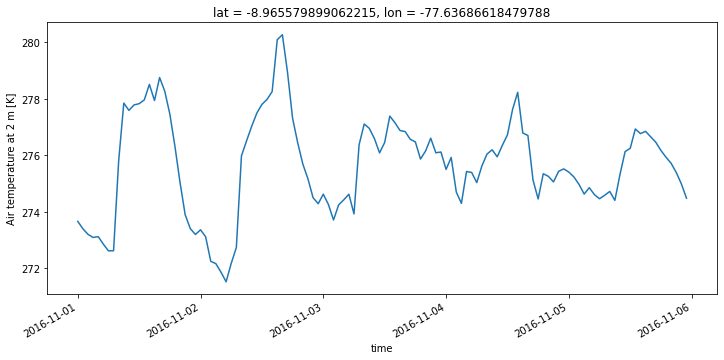

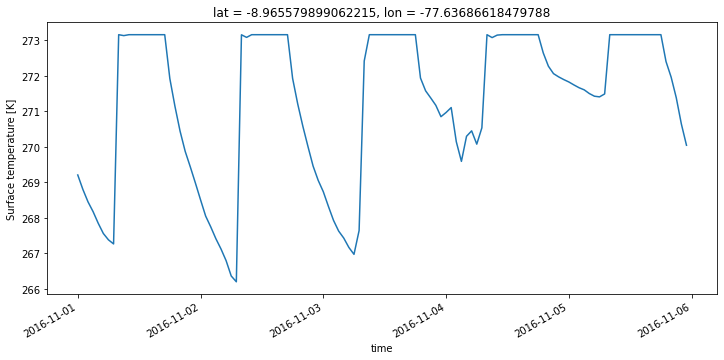

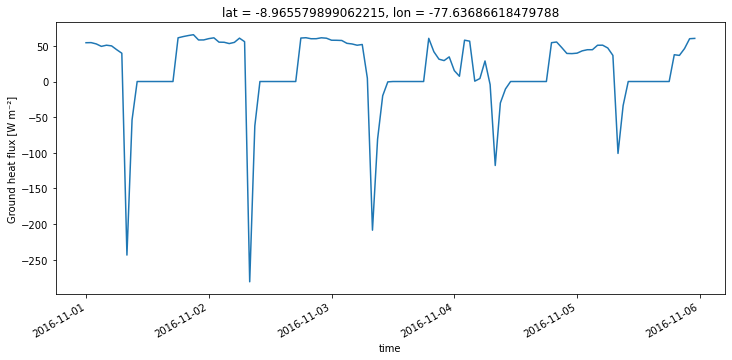

In [39]:
ds['G'].sel(time= slice("2016-11-01", "2016-11-05"))\
.sel(lat=-8.965389, lon=-77.636975, method='nearest').plot.line(x='time',figsize=(12,5))
ds['T2'].sel(time= slice("2016-11-01", "2016-11-05"))\
.sel(lat=-8.965389, lon=-77.636975, method='nearest').plot.line(x='time',figsize=(12,5))
ds['TS'].sel(time= slice("2016-11-01", "2016-11-05"))\
.sel(lat=-8.965389, lon=-77.636975, method='nearest').plot.line(x='time',figsize=(12,5))
ds['B'].sel(time= slice("2016-11-01", "2016-11-05"))\
.sel(lat=-8.965389, lon=-77.636975, method='nearest').plot.line(x='time',figsize=(12,5))
#ds['QRR'].sel(time= slice("2016-12-01", "2016-12-05"))\
#.sel(lat=-8.965389, lon=-77.636975, method='nearest').plot.line(x='time',figsize=(12,5))


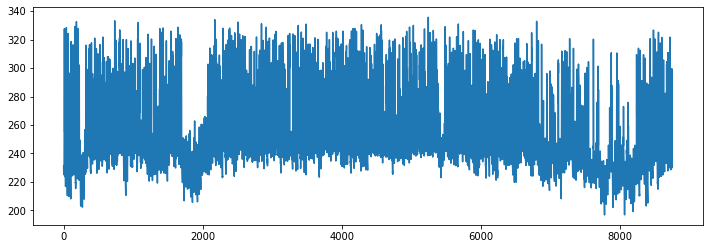

In [12]:
fig, (ax0) = plt.subplots(1,1,figsize=(12,4))
LWin = ds['LWin'].sel(lat=-8.965389, lon=-77.636975, method='nearest').values
plt.plot(LWin)
fig.savefig('LWin.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)



<BarContainer object of 31 artists>

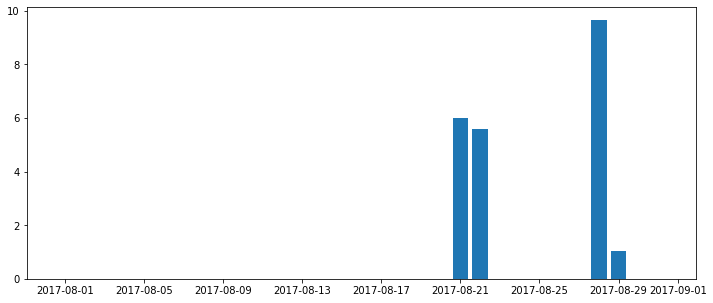

In [4]:
RRR = ds['RRR'].resample(time="d").sum()
RRR_s = RRR.sel(time='2017-08',lat=-8.965389, lon=-77.636975, method='nearest')
#RRR_s.time
fig, (ax0) = plt.subplots(figsize=(12,5))
plt.bar(RRR_s.time,RRR_s.values)

/usr/local/lib/python3.8/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<BarContainer object of 31 artists>

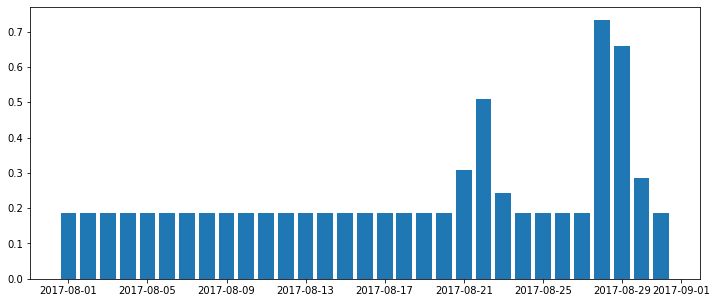

In [5]:
ALB = ds['ALBEDO'].resample(time="d").mean()
ALB_s = ALB.sel(time='2017-08',lat=-8.965389, lon=-77.636975, method='nearest')
fig, (ax0) = plt.subplots(figsize=(12,5))
plt.bar(ALB_s.time,ALB_s.values)

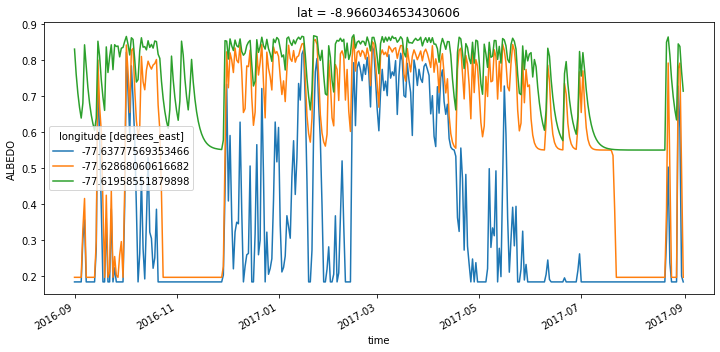

In [6]:
ALB.isel(lat=30, lon=[20, 40 , 60]).plot.line(x='time',figsize=(12,5))

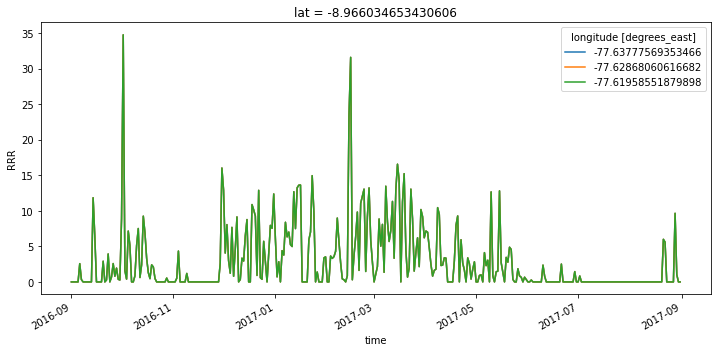

In [7]:
RRR.isel(lat=30, lon=[20, 40 , 60]).plot.line(x='time',figsize=(12,5))

In [10]:
TS = ds['TS'].resample(time="d").mean()

/usr/local/lib/python3.8/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


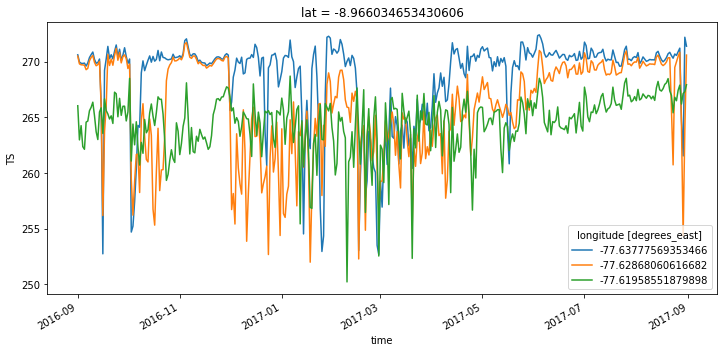

In [12]:
TS.isel(lat=30, lon=[20, 40 , 60]).plot.line(x='time',figsize=(12,5))

In [20]:
B = ds['B'].resample(time="d").mean()

/usr/local/lib/python3.8/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


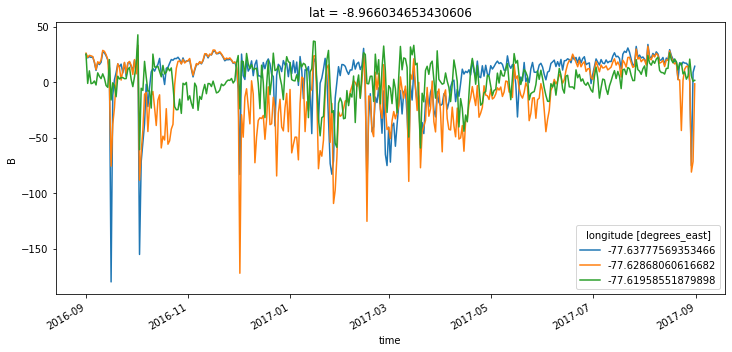

In [21]:
B.isel(lat=30, lon=[20, 40 , 60]).plot.line(x='time',figsize=(12,5))

In [9]:
time_v,lat_v,lon_v = RRR.shape
MASK = ds['MASK'].values
CELL_N = int(np.nansum(MASK[MASK==1]))
ele_v = np.zeros((CELL_N,1))
z1 = 0
for i in range(lat_v):
    for j in range(lon_v):
            if MASK[i,j] == 1:
                ele_v [z1]   = ds['HGT'][i,j]
                z1 = z1+1
#
date_day = create_date(ds['time'].values)

In [10]:
# acumulacion 
SNOWF = ds['SNOWFALL'].resample(time="d").sum()
DEPOS = ds['DEPOSITION'].resample(time="d").sum()
REFRE = ds['REFREEZE'].resample(time="d").sum()
RAIN  = ds['RAIN'].resample(time="d").sum()

In [11]:
SNOWF_z = np.zeros((CELL_N,time_v))
DEPOS_z = np.zeros((CELL_N,time_v))
REFRE_z = np.zeros((CELL_N,time_v))
RAIN_z  = np.zeros((CELL_N,time_v))

In [12]:
for t in range(time_v):
    SNOWF1   = SNOWF[t,:,:]
    DEPOS1   = DEPOS[t,:,:]
    REFRE1   = REFRE[t,:,:]
    RAIN1    = RAIN[t,:,:]

    SNOWF_v = np.zeros((CELL_N,1))
    DEPOS_v = np.zeros((CELL_N,1))
    REFRE_v = np.zeros((CELL_N,1))
    RAIN_v  = np.zeros((CELL_N,1))
    z1 = 0
    for i in range(lat_v):
        for j in range(lon_v):
                if MASK[i,j] == 1:
                    SNOWF_v[z1]   = SNOWF1[i,j].values
                    DEPOS_v[z1]   = DEPOS1[i,j].values
                    REFRE_v[z1]   = REFRE1[i,j].values
                    RAIN_v[z1]    = RAIN1[i,j].values
                    z1 = z1+1
    vara1 = np.concatenate((ele_v, SNOWF_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    SNOWF_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, DEPOS_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    DEPOS_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, REFRE_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    REFRE_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, RAIN_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    RAIN_z[:,t] = vara2[:,1]


Text(0, 0.5, 'Altitude (m)')

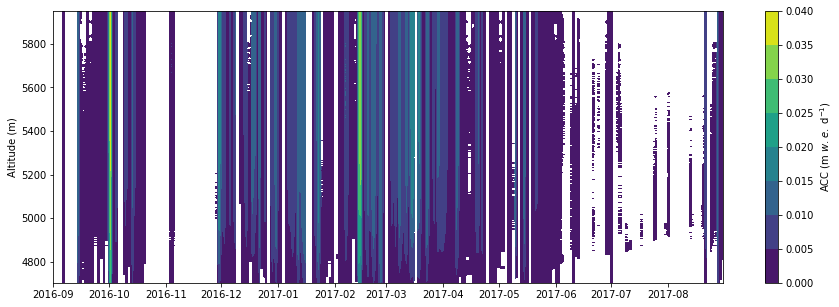

In [13]:
ACC = np.add(SNOWF_z,DEPOS_z,REFRE_z)
ACC[ACC <= 0.0001] = np.nan
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],ACC)
fig.colorbar(im0,ax=ax0, label = 'ACC (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

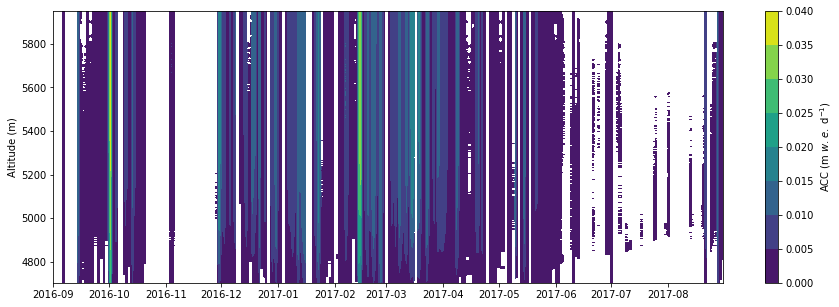

In [14]:
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],REFRE_z)
fig.colorbar(im0,ax=ax0, label = 'ACC (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

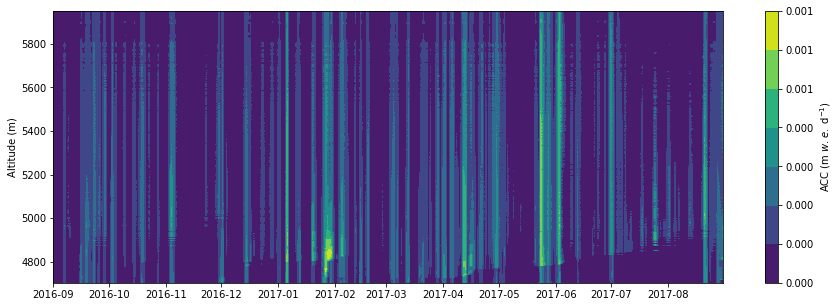

In [15]:
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],DEPOS_z)
fig.colorbar(im0,ax=ax0, label = 'ACC (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

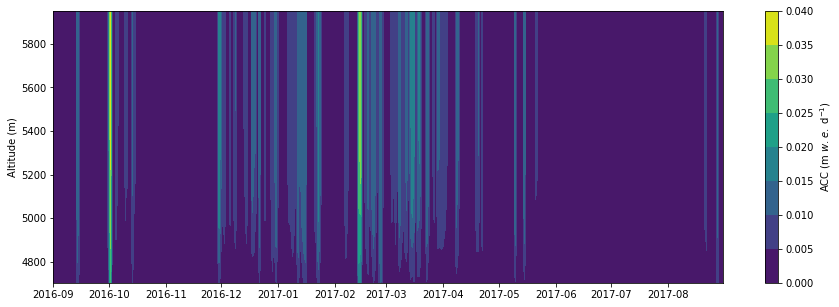

In [16]:
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],SNOWF_z)
fig.colorbar(im0,ax=ax0, label = 'ACC (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

In [17]:
# ablation
surfM = ds['surfM'].resample(time="d").sum()
subM  = ds['subM'].resample(time="d").sum()
SUBL  = ds['SUBLIMATION'].resample(time="d").sum()
EVAP  = ds['EVAPORATION'].resample(time="d").sum()

In [18]:
surfM_z = np.zeros((CELL_N,time_v))
subM_z  = np.zeros((CELL_N,time_v))
SUBL_z  = np.zeros((CELL_N,time_v))
EVAP_z  = np.zeros((CELL_N,time_v))

In [19]:
for t in range(time_v):
    surfM1   = surfM[t,:,:]
    subM1    = subM[t,:,:]
    SUBL1    = SUBL[t,:,:]
    EVAP1    = EVAP[t,:,:]

    surfM_v = np.zeros((CELL_N,1))
    subM_v  = np.zeros((CELL_N,1))
    SUBL_v  = np.zeros((CELL_N,1))
    EVAP_v  = np.zeros((CELL_N,1))
    z1 = 0
    for i in range(lat_v):
        for j in range(lon_v):
                if MASK[i,j] == 1:
                    surfM_v[z1]  = surfM1[i,j].values
                    subM_v[z1]   = subM1[i,j].values
                    SUBL_v[z1]   = SUBL1[i,j].values
                    EVAP_v[z1]   = EVAP1[i,j].values
                    z1 = z1+1
    vara1 = np.concatenate((ele_v, surfM_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    surfM_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, subM_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    subM_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, SUBL_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    SUBL_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, EVAP_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    EVAP_z[:,t] = vara2[:,1]
    

Text(0, 0.5, 'Altitude (m)')

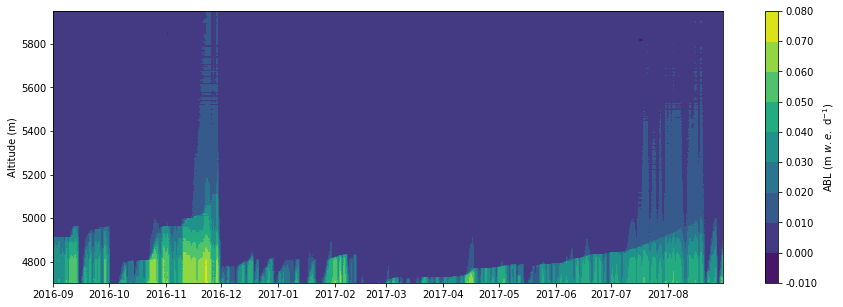

In [20]:
ABL = np.add(surfM_z,subM_z,SUBL_z)
ABL = np.add(ABL,EVAP_z)
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],ABL)
fig.colorbar(im0,ax=ax0, label = 'ABL (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

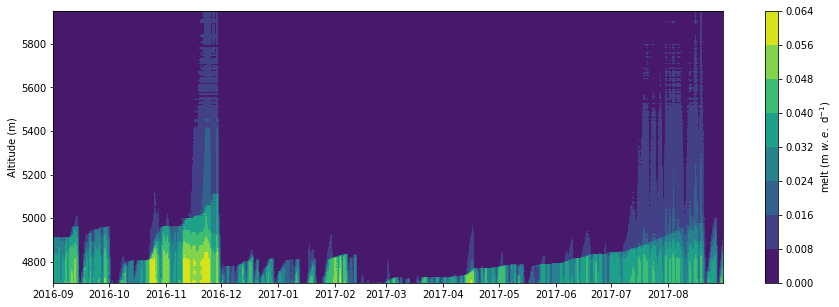

In [21]:
#ABL[ABL >= -0.0001] = np.nan
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],surfM_z)
fig.colorbar(im0,ax=ax0, label = 'melt (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

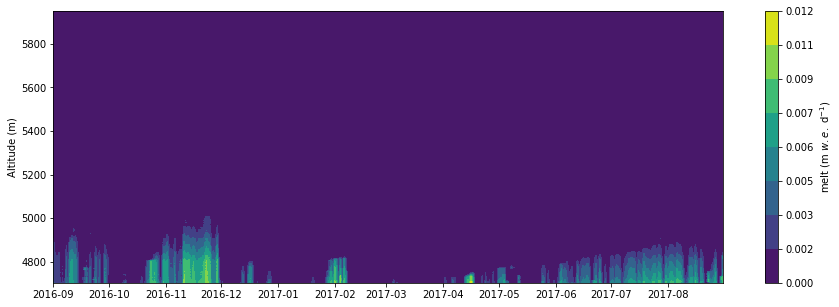

In [22]:
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],subM_z)
fig.colorbar(im0,ax=ax0, label = 'melt (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

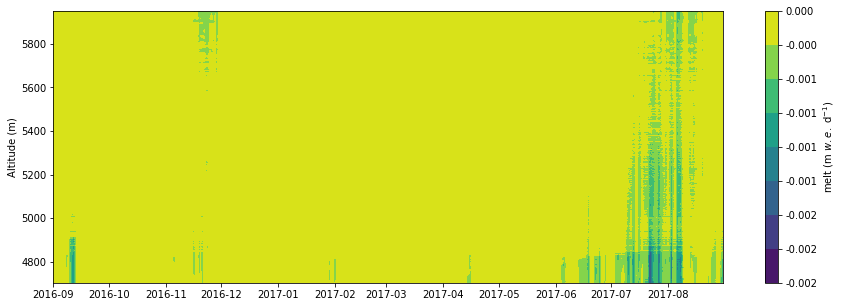

In [23]:
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],EVAP_z)
fig.colorbar(im0,ax=ax0, label = 'melt (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

In [24]:
MBT = ds['MB'].resample(time="d").sum()

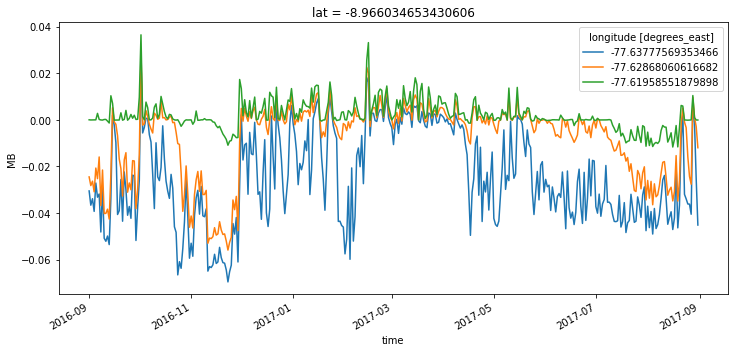

In [25]:
MBT.isel(lat=30, lon=[20, 40 , 60]).plot.line(x='time',figsize=(12,5))

In [26]:
MBT_z  = np.zeros((CELL_N,time_v))
MBT_z1 = np.zeros((CELL_N,time_v))
MBT_z2 = np.zeros((CELL_N,time_v))

In [27]:
for t in range(time_v):

    MBT1   = MBT[t,:,:]
    
    MBT_v  = np.zeros((CELL_N,1))
    MBT_v1 = np.zeros((CELL_N,1))
    MBT_v2 = np.zeros((CELL_N,1))
  
    z1 = 0
    for i in range(lat_v):
        for j in range(lon_v):
                if MASK[i,j] == 1:
                    MBT_v[z1]    = MBT1[i,j].values
                    MBT_v1[z1]   = MBT1[i,j].values
                    MBT_v2[z1]   = MBT1[i,j].values
                    z1 = z1+1
    vara1 = np.concatenate((ele_v, MBT_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    MBT_z[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, MBT_v1), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    MBT_z1[:,t] = vara2[:,1]

    vara1 = np.concatenate((ele_v, MBT_v2), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    MBT_z2[:,t] = vara2[:,1]

Text(0, 0.5, 'Altitude (m)')

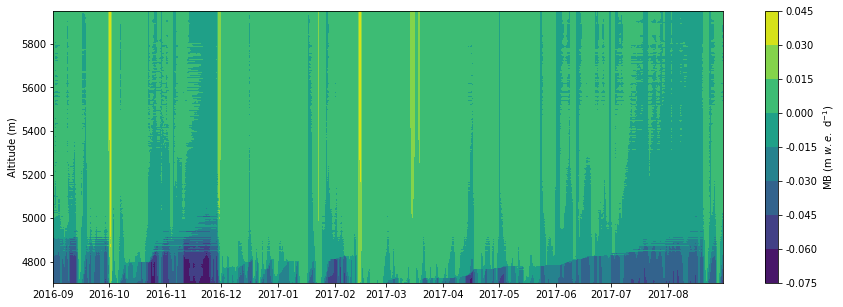

In [28]:
# plot MB
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],MBT_z)
fig.colorbar(im0,ax=ax0, label = 'MB (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_yticks(np.arange(4800, 6000, 200))
ax0.set_ylabel('Altitude (m)')

Text(0, 0.5, 'Altitude (m)')

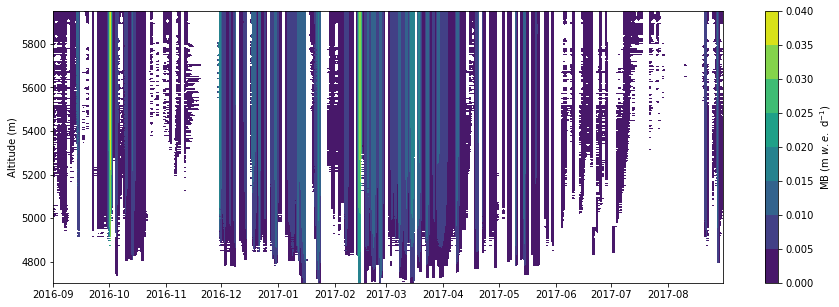

In [29]:
# MB positivo
MBT_z1[MBT_z1 <= 0.000] = np.nan
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],MBT_z1)
fig.colorbar(im0,ax=ax0, label = 'MB (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_ylabel('Altitude (m)')

(4702.9404296875, 5951.29833984375)

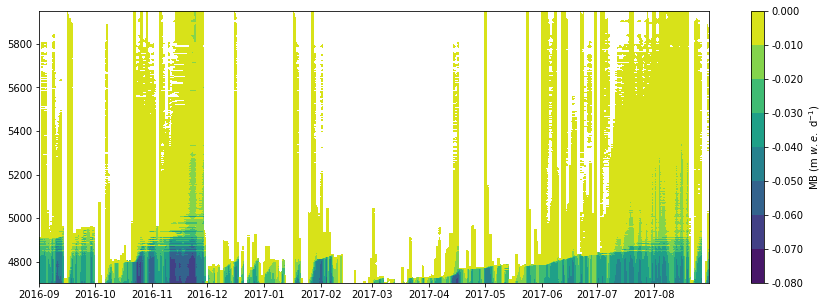

In [30]:
# MB negativo
MBT_z2[MBT_z2 >= 0.000] = np.nan
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],MBT_z2)
fig.colorbar(im0,ax=ax0, label = 'MB (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_ylim(np.min(ele_v), np.max(ele_v))

In [31]:
ALB_z = np.zeros((CELL_N,time_v))
ALB_z[ALB_z == 0] = np.nan

for t in range(time_v):
    ALB1 = ALB[t,:,:]
    ALB_v = np.zeros((CELL_N,1))
    z1 = 0
    for i in range(lat_v):
        for j in range(lon_v):
                if MASK[i,j] == 1:
                    ALB_v[z1]   = ALB1[i,j].values
                    z1 = z1+1
    vara1 = np.concatenate((ele_v, ALB_v), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    ALB_z[:,t] = vara2[:,1]

(4702.9404296875, 5951.29833984375)

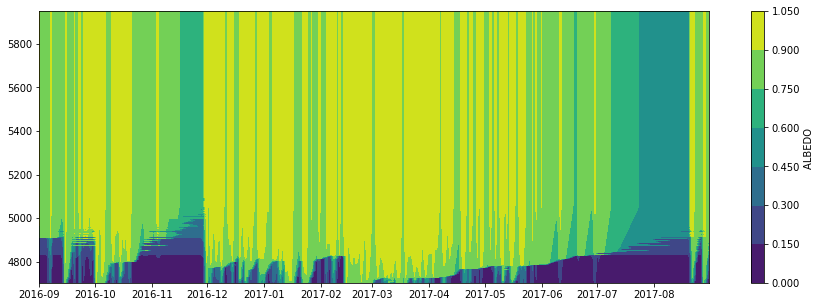

In [32]:
# plot albedo 
fig, (ax0) = plt.subplots(figsize=(15,5))
im0 = ax0.contourf(date_day,vara2[:,0],ALB_z)
fig.colorbar(im0,ax=ax0, label = 'ALBEDO ', format='%1.3f')
ax0.set_ylim(np.min(ele_v), np.max(ele_v))

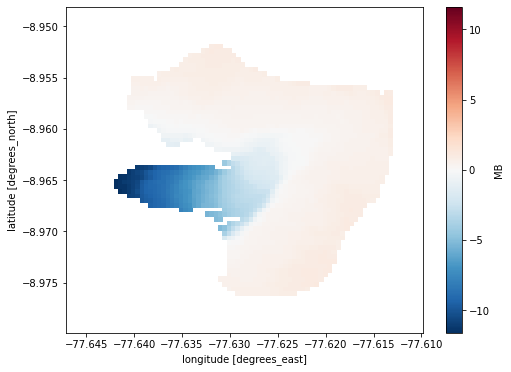

In [33]:
VAR = ds['MB'].sum('time').where(ds['MASK']==1).plot(figsize=(8,6))

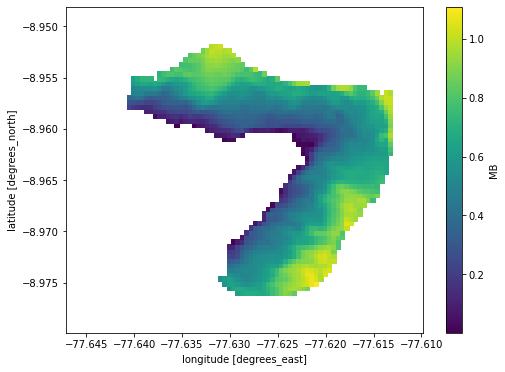

In [34]:
VAR = ds['MB'].sum('time').where(ds['MASK']==1)
VAR.where(VAR > 0.0).plot(figsize=(8,6))

1990.5161427794053

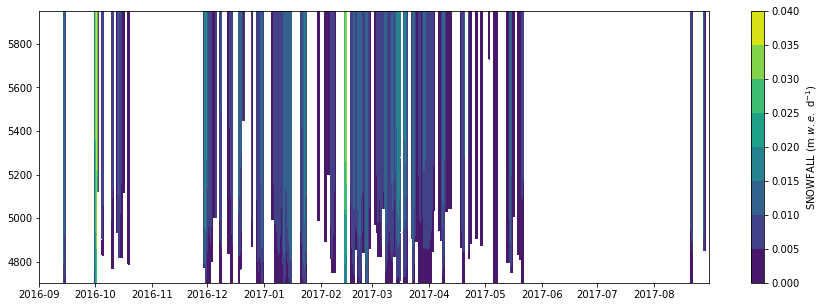

In [35]:
fig, (ax0) = plt.subplots(figsize=(15,5))
SNOWF_z[SNOWF_z < 0.001] = np.nan
im0 = ax0.contourf(date_day,vara2[:,0],SNOWF_z)
fig.colorbar(im0,ax=ax0, label = 'SNOWFALL (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_ylim(np.min(ele_v), np.max(ele_v))
np.nansum(SNOWF_z)

In [1]:
fig.savefig('out/snowfall.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)

NameError: name 'fig' is not defined

(4702.9404296875, 5951.29833984375)

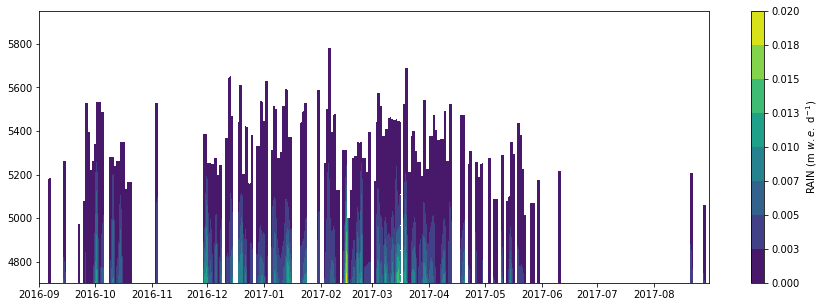

In [32]:
fig, (ax0) = plt.subplots(figsize=(15,5))
RAIN_z[RAIN_z < 0.001] = np.nan
im0 = ax0.contourf(date_day,vara2[:,0],RAIN_z/1000)
fig.colorbar(im0,ax=ax0, label = 'RAIN (m $w.e.$ d$^{-1}$)', format='%1.3f')
ax0.set_ylim(np.min(ele_v), np.max(ele_v))